# Health Care Fraud Detection

# Aim: 
- **Identify Potentially Fradulent Claims in Heathcare Insurance Data**

# Objectives: 
- **Develop a robust, data-driven solution to identify potentially fraudulent healthcare insurance claims by leveraging advanced analytical techniques and machine learning models.** 
- **The solution should aim to enhance detection accuracy, reduce false positives, and improve the efficiency of the fraud investigation process.**

# Problem Statement: 
**Health Provider fraud is a major issue for Medicare, significantly contributing to rising Medicare spending,increased premiums, and reduced trust among policyholders. This type of fraud is an organized crime involving providers, physicians, and beneficiaries who collaborate to make fraudulent claims. Analysis of Medicare data has identified many physicians and providers engaging in such fraud. Insurance companies are particularly vulnerable to these practices, leading them to increase premiums, which in turn makes healthcare increasingly costly.**

# Methodology

### STEP 1: Importing, Visualization and Cleaning of Dataset:

- We imported and dive into our dataset. Cleaned it and visulaize our dataset.

### STEP 2: EDA and Preparing our Dataset for Machine Learning:

- **EDA** We conducted comprehensive Exploratory Data Analysis, and unveil valuable insights about potential fraudulent providers. EDA also involve data visualization, summary statistics, and identifying patterns in the data. Also, we prepared our dataset for Machine learnig model. Our Activity includes but not limited to:

- **Feature Engineering:** Create new features or transform existing ones that can provide additional insights or improve model performance. Feature engineering might involve deriving features related to age, dead or alive, and age_category etc.

- **Data Preprocessing:** We Prepared our data for model training. This includes handling missing values, encoding categorical variables, and scaling features as needed.etc

### STEP 3: Model Building and Evaluation

- **Machine Learning Model Development:** We Train various machine learning clasification models to predict potential fraudulent records. Experimented with different algorithms such as Logistic reggresion, decision trees classifier,AdaBoostClassifier, DecisionTreeClassifier,GradientBoostingClassifier(),XGBClassifier find the best-performing model. 

- **Model Evaluation:** We Assess the performance of our models using appropriate evaluation metrics like AUC,Accuracy, Recall, F1 score, Precision, etc.


## Group5 Members:
1. Collins Emezie Ugwuozor
2. Azeez Babatunde Abiodun
3. Akinbuli Feyisara
4. Hannah Onuigbo
5. Emmanuel Enesi
6. Olumide Anifowose
7. Kolawole Abdul-Quadri Seun

## SECTION 1: Importing, Visualization and Cleaning of Dataset

In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
# Importing our dataset
health_claims_data = ['Test.csv','Test_Beneficiarydata.csv','Test_Inpatientdata.csv','Test_Outpatientdata.csv','Train.csv','Train_Beneficiarydata.csv','Train_Inpatientdata.csv','Train_Outpatientdata.csv']

data_frames = {}  # Dictionary to store DataFrames

for df_name in health_claims_data:
    df = pd.read_csv(df_name)
    data_frames[df_name.split('.')[0]] = df  # Use file name without extension as DataFrame key

In [4]:
#To access our DataFrames we use their respective keys in the data_frames dictionary.
# Test Dataset
Test_df = data_frames['Test']
Test_Beneficiarydata_df = data_frames['Test_Beneficiarydata']
Test_Inpatientdata_df = data_frames['Test_Inpatientdata']
Test_Outpatientdata_df = data_frames['Test_Outpatientdata']

# Train Dataset
Train_df = data_frames['Train']
Train_Beneficiarydata_df = data_frames['Train_Beneficiarydata']
Train_Inpatientdata_df = data_frames['Train_Inpatientdata']
Train_Outpatientdata_df = data_frames['Train_Outpatientdata']

### Train_Beneficiarydata_df

In [5]:
Train_Beneficiarydata_df.head() #To view our train beneficiary data

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
Train_Beneficiarydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [7]:
#Lets create a new column 'Dead_Alive' with flag 0 means Dead and 1 means Alive

Train_Beneficiarydata_df.loc[Train_Beneficiarydata_df.DOD.isna(),'Dead_Alive']=0
Train_Beneficiarydata_df.loc[Train_Beneficiarydata_df.DOD.notna(),'Dead_Alive']=1
Train_Beneficiarydata_df.loc[:,'Dead_Alive'].head(7)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: Dead_Alive, dtype: float64

In [8]:
Train_Beneficiarydata_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_Alive
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,70,0.0
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,0,0,30,50,0.0
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,1,2,2,2,0,0,90,40,0.0
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,1,2,0,0,1810,760,0.0
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,1,2,2,2,2,0,0,1790,1200,0.0


### Creating Age Column

In [9]:
# Lets create a new column Age

# Format the DOB and DOD to year
Train_Beneficiarydata_df['DOD'] = pd.to_datetime(Train_Beneficiarydata_df['DOD'], format='%Y-%m-%d')
Train_Beneficiarydata_df['DOB'] = pd.to_datetime(Train_Beneficiarydata_df['DOB'], format='%Y-%m-%d')

# find the max DOD year. 
Train_Beneficiarydata_df["DOD"].max()
Train_Beneficiarydata_df[Train_Beneficiarydata_df.DOD == Train_Beneficiarydata_df.DOD.max()]
#Train_Beneficiarydata_df["DOD"].fillna("2009-12-01", inplace = True)
Train_Beneficiarydata_df["DOD"].fillna(Train_Beneficiarydata_df.DOD.max(), inplace = True)

# Create the age column
Train_Beneficiarydata_df['Age'] = Train_Beneficiarydata_df['DOD'].dt.year - Train_Beneficiarydata_df['DOB'].dt.year

In [10]:
Train_Beneficiarydata_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_Alive,Age
0,BENE11001,1943-01-01,2009-12-01,1,1,0,39,230,12,12,...,1,2,1,1,36000,3204,60,70,0.0,66
1,BENE11002,1936-09-01,2009-12-01,2,1,0,39,280,12,12,...,2,2,2,2,0,0,30,50,0.0,73
2,BENE11003,1936-08-01,2009-12-01,1,1,0,52,590,12,12,...,1,2,2,2,0,0,90,40,0.0,73
3,BENE11004,1922-07-01,2009-12-01,1,1,0,39,270,12,12,...,1,1,1,2,0,0,1810,760,0.0,87
4,BENE11005,1935-09-01,2009-12-01,1,1,0,24,680,12,12,...,2,2,2,2,0,0,1790,1200,0.0,74


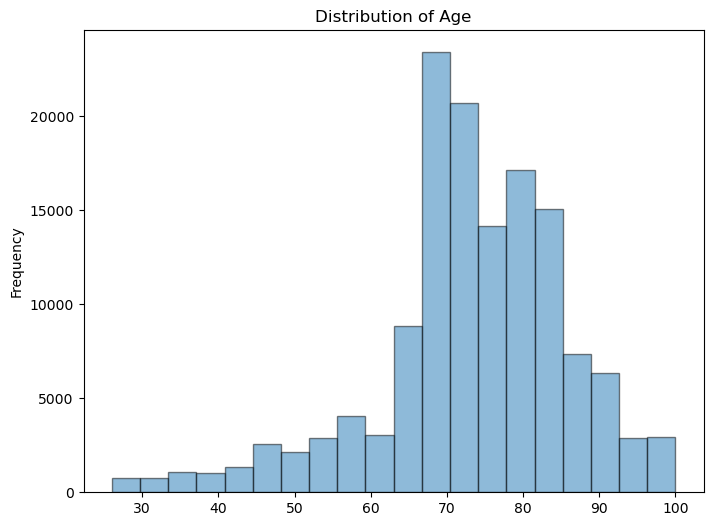

In [11]:
ax = Train_Beneficiarydata_df['Age'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='k', title = 'Distribution of Age')

In [12]:
#df['Age_Category'] = ['Young_adult' if 20<age<=35 else 'Working_Class' if 35<age<=65 else 'Old' for age in list(Train_Beneficiarydata_df['Age'].values)]
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif 20 < age <= 35:
        return 'Young_35_and_below'
    elif 35 < age <= 65:
        return 'Working_Class_35_65'
    else:
        return 'Old_65_and_above'

Train_Beneficiarydata_df['Age_Category'] = Train_Beneficiarydata_df['Age'].apply(categorize_age)

In [13]:
# getting the percentage of each age category
Train_Beneficiarydata_df.Age_Category.value_counts() / len(df) * 100

Age_Category
Old_65_and_above       22.366568
Working_Class_35_65     4.023471
Young_35_and_below      0.371810
Name: count, dtype: float64

**Insight**
- Majority of the claim Beneficiary (InPatients) are between the age of 65 - 90 years. The Old group
- From the age categogization above, 22.4% fell in the old category, 4% fell in the working class category and less than 1% fell in the young category

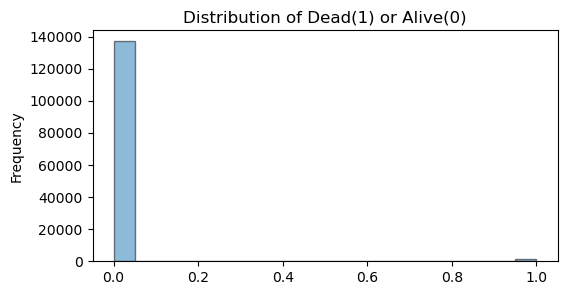

In [14]:
ax = Train_Beneficiarydata_df['Dead_Alive'].plot.hist(bins=20, alpha=0.5, figsize=(6, 3), edgecolor='k', title = 'Distribution of Dead(1) or Alive(0)')

In [15]:
#Getting the percentage of those alive or dead
Train_Beneficiarydata_df.Dead_Alive.value_counts() / len(df) * 100

Dead_Alive
0.0    26.487386
1.0     0.274464
Name: count, dtype: float64

**Insight**
- Almost all the claim beneficiaries are Alive
- 26.5% alive and 0.27% dead

In [16]:
Train_Beneficiarydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              138556 non-null  datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

### Train_df

In [17]:
Train_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


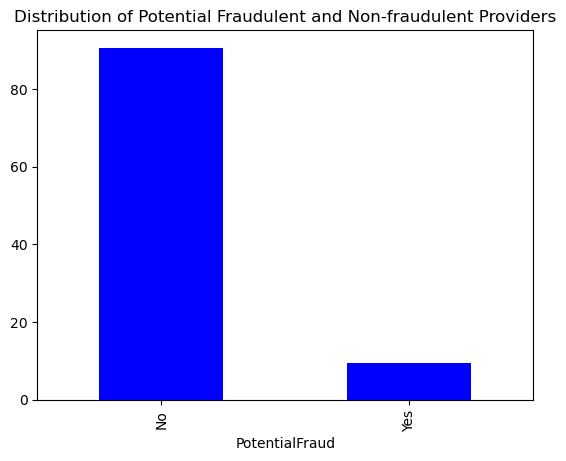

In [18]:
# Plotting the providers are potentially fraudulent(YES) and notfraudulent(NO)
Train_df.head()
T_fraud = Train_df['PotentialFraud'].value_counts()
grouped_train_df = T_fraud.to_frame()

grouped_train_df.columns = ['count']
grouped_train_df['Fraud'] = grouped_train_df.index
grouped_train_df['Percentage'] = (grouped_train_df['count']/sum(grouped_train_df['count']))*100
grouped_train_df['Percentage'].plot( kind='bar',color = "blue", title = 'Distribution of Potential Fraudulent and Non-fraudulent Providers');

**Insight**
- Our Label data is not balanced
- Imbalance Dataset is of a serious concern here

In [19]:
# List Pottential Fraudulent Providers in Train dataset
Train_fraudulent =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_fraudulent = Train_df.loc[(Train_df['PotentialFraud'] == 'Yes')]
Train_fraudulent.head()

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes


In [20]:
# How many potential fraudulent providers do we have in Train Dataset
print(f'The Total Number of Potential Fraudulent Providers in the Train Dataset: {len(Train_fraudulent)}')

The Total Number of Potential Fraudulent Providers in the Train Dataset: 506


### Train_Inpatientdata_df

In [21]:
# Display Train Inpatient dataset
Train_Inpatientdata_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [22]:
# How many Inpatient(admitted) were in Train_Inpatientdata_df
print(f'The Total Number of admitted patients in Train Inpatient Dataset: {len(Train_Inpatientdata_df)}')

The Total Number of admitted patients in Train Inpatient Dataset: 40474


In [23]:
# Total number of providers in Train Inpatient Dataset
Train_Inpatientdata_df['Provider'].nunique()

2092

### Creating Days_Admitted Column

In [24]:
# Create new column 'Days_Admitted' indicating number of days patient was admitted in hospital
# As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatientdata_df['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata_df['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata_df['DischargeDt'] = pd.to_datetime(Train_Inpatientdata_df['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata_df['Days_Admitted'] = ((Train_Inpatientdata_df['DischargeDt'] - Train_Inpatientdata_df['AdmissionDt']).dt.days)+1

In [25]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min Admission For Days Train: ',Train_Inpatientdata_df.Days_Admitted.min())
print('Max Admission For Days Train: ',Train_Inpatientdata_df.Days_Admitted.max())
Train_Inpatientdata_df.Days_Admitted.isnull().sum()   #Check Null values.

Min Admission For Days Train:  1
Max Admission For Days Train:  36


0

In [26]:
# Determine providers in Train Inpatiant Dataset that are Pottentially Fraudulent
inpatient_fraud_providers_df = pd.merge(Train_Inpatientdata_df, Train_fraudulent, how='inner', on='Provider')
inpatient_fraud_providers_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Days_Admitted,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Yes
1,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,7,Yes
2,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,5,Yes
3,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,8,Yes
4,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,NaN,2009-07-01,...,51881,NaN,9672.0,NaN,NaN,NaN,NaN,NaN,9,Yes


In [27]:
# How many providers in Train Inpatiant Dataset are Pottentially Fraudulent
inpatient_fraud_providers_df['Provider'].nunique()

440

In [28]:
# Percentage of Train inpatient providers that are potentially fraudulent
((inpatient_fraud_providers_df['Provider'].nunique())/(Train_Inpatientdata_df['Provider'].nunique()))*100

21.03250478011472

In [29]:
# Percentage of Potentially Train inpatient activity
(len(inpatient_fraud_providers_df))/(len(Train_Inpatientdata_df))*100

57.81983495577408

**Insight**
- 40474 patients were admitted in the Train Inpatient Dataset
- 57.82% of admissions are Pottentially fraudulent activity
- Out of 2092 Providers in Train Inpatient Dataset 440 are Potentially Fraudulent
- 21.03% of the Train Inpatient Providers are Potentially Fraudulent Providers

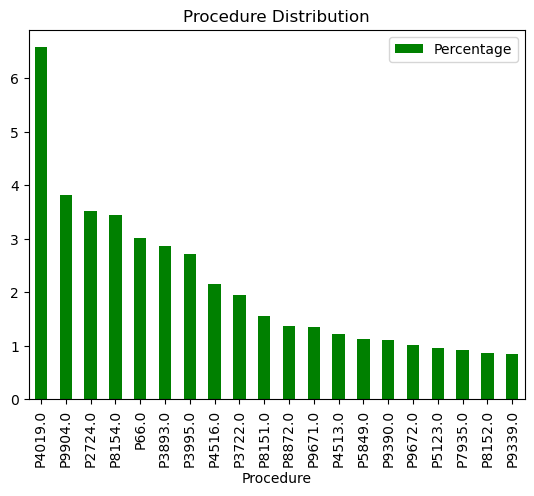

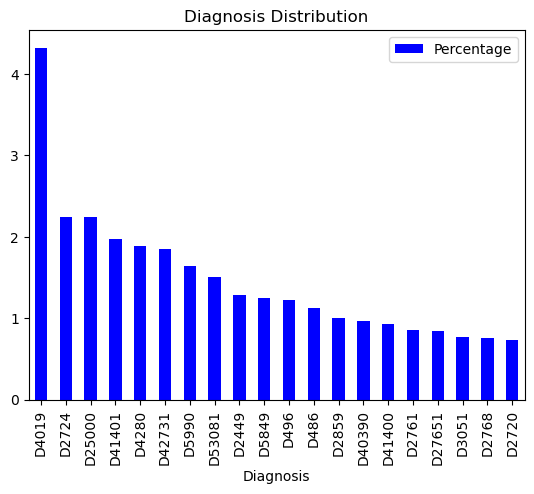

In [30]:
df_procedures1 =  pd.DataFrame(columns = ['Procedures'])
df_procedures1['Procedures'] = pd.concat([Train_Inpatientdata_df["ClmProcedureCode_1"], Train_Inpatientdata_df["ClmProcedureCode_2"], Train_Inpatientdata_df["ClmProcedureCode_3"], Train_Inpatientdata_df["ClmProcedureCode_4"], Train_Inpatientdata_df["ClmProcedureCode_5"], Train_Inpatientdata_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures1['Procedures'].head(10)
grouped_procedure_df = df_procedures1['Procedures'].value_counts()

df_diagnosis = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis['Diagnosis'] = pd.concat([Train_Inpatientdata_df["ClmDiagnosisCode_1"], Train_Inpatientdata_df["ClmDiagnosisCode_2"], Train_Inpatientdata_df["ClmDiagnosisCode_3"], Train_Inpatientdata_df["ClmDiagnosisCode_4"], Train_Inpatientdata_df["ClmDiagnosisCode_5"], Train_Inpatientdata_df["ClmDiagnosisCode_6"], Train_Inpatientdata_df["ClmDiagnosisCode_7"],  Train_Inpatientdata_df["ClmDiagnosisCode_8"], Train_Inpatientdata_df["ClmDiagnosisCode_9"], Train_Inpatientdata_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis['Diagnosis'].head(10)
grouped_diagnosis_df = df_diagnosis['Diagnosis'].value_counts()

grouped_procedure_df1 = grouped_procedure_df.to_frame()
grouped_procedure_df1.columns = ['count']
grouped_procedure_df1['Procedure'] = grouped_procedure_df1.index
grouped_procedure_df1['Percentage'] = (grouped_procedure_df1['count']/sum(grouped_procedure_df1['count']))*100

grouped_diagnosis_df = grouped_diagnosis_df.to_frame()
grouped_diagnosis_df.columns = ['count']
grouped_diagnosis_df['Diagnosis'] = grouped_diagnosis_df.index
grouped_diagnosis_df['Percentage'] = (grouped_diagnosis_df['count']/sum(grouped_diagnosis_df['count']))*100

# taking only top 20 

plot_procedure_df1 = grouped_procedure_df1.head(20)
plot_diagnosis_df1 = grouped_diagnosis_df.head(20)

# Plotting the most commonly used diagnosis and procedures 
from matplotlib import pyplot as plt

plot_procedure_df1['Procedure'] = 'P' + plot_procedure_df1['Procedure'].astype(str)
plot_procedure_df1.sort_values(by=['Percentage'])
plot_procedure_df1.plot(x ='Procedure', y='Percentage', kind='bar', color ='green', title='Procedure Distribution')

plot_diagnosis_df1['Diagnosis'] = 'D' + plot_diagnosis_df1['Diagnosis'].astype(str)
plot_diagnosis_df1.sort_values(by=['Percentage'])
plot_diagnosis_df1.plot(x ='Diagnosis', y='Percentage', kind='bar', color ='blue', title='Diagnosis Distribution');


**Insight**
- The most common used Claim Procedure Code is 4019
- The most common used claim Diagnostic Code is 4019

### Train_OutPatient_df

In [31]:
# Display Train Outpatient dataset
Train_Outpatientdata_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [32]:
# How many Outpatient(visitors) were in Train_Inpatientdata_df
print(f'The Total Number of visiting patients in Train Outpatient Dataset: {len(Train_Outpatientdata_df)}')

The Total Number of visiting patients in Train Outpatient Dataset: 517737


In [33]:
# Total number of providers in Train Outpatient Dataset
Train_Outpatientdata_df['Provider'].nunique()

5012

In [34]:
# Determine providers in Train Inpatiant Dataset that are Pottentially Fraudulent
Outpatient_fraud_providers_df = pd.merge(Train_Outpatientdata_df, Train_fraudulent, how='inner', on='Provider')
Outpatient_fraud_providers_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [35]:
# How many providers in Train Outpatiant Dataset are Pottentially Fraudulent
Outpatient_fraud_providers_df['Provider'].nunique()

462

In [36]:
# Percentage of Train Outpatient providers that are potentially fraudulent
((round(Outpatient_fraud_providers_df['Provider'].nunique())/(Train_Outpatientdata_df['Provider'].nunique()))*100)

9.217877094972067

In [37]:
# Create new column 'Days_Admitted' indicating number of days patient was admitted in hospital is 0 for outpatient  

Train_Outpatientdata_df['Days_Admitted'] = 0
Train_Outpatientdata_df.Days_Admitted.isnull().sum()   #Check Null values

0

In [38]:
# Percentage of Potentially Train Outpatient activity
(len(Outpatient_fraud_providers_df))/(len(Train_Outpatientdata_df))*100

36.58112130290089

**Insight**
- 517737 patients visited the hospitals but were not admitted in the Train Outpatient Dataset

- 36.58% of visitations are Pottentially for fraudulent activity

- Out of 5012 Providers in Train Outpatient Dataset 462 are Potentially Fraudulent

- 9.21% of the Train Outpatient Providers are Potentially Fraudulent Providers

## SECTION 2: EDA and Preparing our Dataset for Machine Learning

In [39]:
## Creating the master DF for all the Train Dataset both Outpatient and Inpatient Data
Train_Inpatientdata_df['EncounterType'] = 0
Train_Outpatientdata_df['EncounterType'] = 1
frames = [Train_Inpatientdata_df, Train_Outpatientdata_df]
TrainInAndOut = pd.concat(frames)
TrainInAndOutBenf = pd.merge(TrainInAndOut, Train_Beneficiarydata_df, how='inner', on='BeneID')
Master_df = pd.merge(TrainInAndOutBenf, Train_df, how='inner', on='Provider')

In [40]:
Master_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_Alive,Age,Age_Category,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,0.0,66,Old_65_and_above,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,36000,3204,60,70,0.0,66,Old_65_and_above,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,0.0,66,Old_65_and_above,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,0.0,95,Old_65_and_above,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,2,21260,2136,120,100,0.0,71,Old_65_and_above,No


### Feature Selection

In [41]:
# Lets remove unnecessary columns ,as we grouped based on these columns and derived maximum information from them.

cols=Master_df.columns
cols[:]


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Days_Admitted', 'EncounterType', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'Ch

In [42]:
remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

Train_category=Master_df.drop(axis=1,columns=remove_these_columns)

In [43]:
Train_category

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Days_Admitted,EncounterType,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_Alive,Age,Age_Category,PotentialFraud
0,PRV55912,26000,1068.0,7,0,1,1,0,12,12,...,1,1,36000,3204,60,70,0.0,66,Old_65_and_above,Yes
1,PRV55907,5000,1068.0,3,0,1,1,0,12,12,...,1,1,36000,3204,60,70,0.0,66,Old_65_and_above,No
2,PRV56046,5000,1068.0,4,0,1,1,0,12,12,...,1,1,36000,3204,60,70,0.0,66,Old_65_and_above,No
3,PRV52405,5000,1068.0,9,0,2,2,0,12,12,...,1,1,5000,1068,250,320,0.0,95,Old_65_and_above,No
4,PRV56614,10000,1068.0,18,0,2,1,Y,12,12,...,2,2,21260,2136,120,100,0.0,71,Old_65_and_above,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV53699,800,0.0,0,1,2,1,0,12,12,...,1,2,0,0,5470,1870,0.0,57,Working_Class_35_65,No
558207,PRV53702,400,0.0,0,1,2,1,0,12,12,...,1,2,0,0,5470,1870,0.0,57,Working_Class_35_65,No
558208,PRV53676,60,0.0,0,1,2,1,0,12,12,...,1,2,0,0,5470,1870,0.0,57,Working_Class_35_65,No
558209,PRV53689,70,0.0,0,1,2,1,0,12,12,...,1,2,0,0,5470,1870,0.0,57,Working_Class_35_65,No


In [44]:
Train_category.Days_Admitted.isna().sum()

0

In [45]:
## Lets Check shape and missing values
Train_category.dropna(inplace=True)
print('Train Shape :',Train_category.shape)
# print('Test Shape : ',Test_category.shape)
print("Train Missing Values",Train_category.isnull().sum().sum())
# print("Test Missing Values",Test_category.isnull().sum().sum())

Train Shape : (557312, 29)
Train Missing Values 0


### Type Conversion

In [46]:
## Lets Convert types of gender and race to categorical.

Train_category.Gender=Train_category.Gender.astype('category')
# Test_category.Gender=Test_category.Gender.astype('category')

Train_category.Race=Train_category.Race.astype('category')
# Test_category.Race=Test_category.Race.astype('category')

### Dummification

In [47]:
# Lets create dummies for categorrical columns.

Train_category=pd.get_dummies(Train_category,columns=['Gender','Race'],drop_first=True)
# Test_category=pd.get_dummies(Test_category,columns=['Gender','Race'],drop_first=True)

In [48]:
Train_category.head()
#Test_category.iloc[135391:135393]

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Days_Admitted,EncounterType,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_Alive,Age,Age_Category,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7,0,0,12,12,1,2,...,60,70,0.0,66,Old_65_and_above,Yes,False,False,False,False
1,PRV55907,5000,1068.0,3,0,0,12,12,1,2,...,60,70,0.0,66,Old_65_and_above,No,False,False,False,False
2,PRV56046,5000,1068.0,4,0,0,12,12,1,2,...,60,70,0.0,66,Old_65_and_above,No,False,False,False,False
3,PRV52405,5000,1068.0,9,0,0,12,12,2,1,...,250,320,0.0,95,Old_65_and_above,No,True,True,False,False
4,PRV56614,10000,1068.0,18,0,Y,12,12,2,1,...,120,100,0.0,71,Old_65_and_above,No,True,False,False,False


### Convert Target values to 1 and 0,where '1' means Yes and '0' means No

In [49]:
Train_category.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_category.head()
Train_category.PotentialFraud=Train_category.PotentialFraud.astype('int64')

In [50]:
Train_category.PotentialFraud.min()

0

In [51]:
Train_category.PotentialFraud.dtypes

dtype('int64')

In [52]:
Train_category.PotentialFraud.max()

1

In [53]:
Train_category

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Days_Admitted,EncounterType,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_Alive,Age,Age_Category,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7,0,0,12,12,1,2,...,60,70,0.0,66,Old_65_and_above,1,False,False,False,False
1,PRV55907,5000,1068.0,3,0,0,12,12,1,2,...,60,70,0.0,66,Old_65_and_above,0,False,False,False,False
2,PRV56046,5000,1068.0,4,0,0,12,12,1,2,...,60,70,0.0,66,Old_65_and_above,0,False,False,False,False
3,PRV52405,5000,1068.0,9,0,0,12,12,2,1,...,250,320,0.0,95,Old_65_and_above,0,True,True,False,False
4,PRV56614,10000,1068.0,18,0,Y,12,12,2,1,...,120,100,0.0,71,Old_65_and_above,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV53699,800,0.0,0,1,0,12,12,1,1,...,5470,1870,0.0,57,Working_Class_35_65,0,True,False,False,False
558207,PRV53702,400,0.0,0,1,0,12,12,1,1,...,5470,1870,0.0,57,Working_Class_35_65,0,True,False,False,False
558208,PRV53676,60,0.0,0,1,0,12,12,1,1,...,5470,1870,0.0,57,Working_Class_35_65,0,True,False,False,False
558209,PRV53689,70,0.0,0,1,0,12,12,1,1,...,5470,1870,0.0,57,Working_Class_35_65,0,True,False,False,False


### Data Aggregation to the Providers level

In [54]:
### Lets aggregate claims data to unique providers.

Train_category_groupedbyProv_PF=Train_category.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Train_category_groupedbyProv_PF = Train_category_groupedbyProv_PF.drop(axis=1,columns='RenalDiseaseIndicator')
Train_category_groupedbyProv_PF = Train_category_groupedbyProv_PF.drop(axis=1,columns='Age_Category')
#Test_category_groupedbyProv_PF=Test_category.groupby(['Provider'],as_index=False).agg('sum')

In [55]:
Train_category_groupedbyProv_PF.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Days_Admitted,EncounterType,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_Alive,Age,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30,20,300,300,35,31,...,440150,22428,65380,11598,0.0,1957,16,4,0,0
1,PRV51003,1,605670,66286.0,382,70,1560,1567,208,184,...,999000,122948,353520,97300,1.0,9181,78,24,0,1
2,PRV51004,0,52170,310.0,0,149,1768,1782,234,210,...,648430,64808,327040,92790,1.0,10700,103,24,5,0
3,PRV51005,1,280910,3700.0,0,1165,13872,13910,1904,1650,...,4221950,441724,2457840,741323,4.0,81551,654,262,10,0
4,PRV51007,0,33710,3264.0,19,69,852,852,118,104,...,219600,32040,124540,33820,1.0,4953,38,14,0,0


In [56]:
print('Providers in Train:' ,Train_category_groupedbyProv_PF.shape)
#print('Providers in Test :',Test_category_groupedbyProv_PF.shape)

Providers in Train: (5409, 29)


### Train Validation split

In [57]:
## Lets Seperate out Target and providers from independent variables.Create Target column y.

X=Train_category_groupedbyProv_PF.drop(axis=1,columns=['Provider','PotentialFraud'])
y=Train_category_groupedbyProv_PF['PotentialFraud']

### Standardization

In [58]:
## Lets apply StandardScaler and transform values to its z form,where 99.7% values range between -3 to 3.
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

#X_teststd=sc.transform(Test_category_groupedbyProv_PF.iloc[:])   #Apply Standard Scaler to unseen data as well.

print(X_std[0:3,:])
#print(X_teststd[0:3,:])

[[ 0.01416122 -0.10993462 -0.11785197 -0.28410043 -0.2858608  -0.28590054
  -0.29741955 -0.29570897 -0.30020606 -0.28889396 -0.28949979 -0.28137391
  -0.2949139  -0.29687793 -0.28164752 -0.28661358 -0.29259982 -0.07214991
  -0.25082676 -0.26717052 -0.30541751 -0.32956583 -0.27909216 -0.27721101
  -0.21847637 -0.17003203 -0.19579251]
 [ 1.91928148  2.33530019  2.15492159 -0.09649538  0.10170252  0.10355833
   0.09928611  0.1001941   0.08343658  0.12613281  0.10620909  0.11389989
   0.08636034  0.07102271  0.12553804  0.11284628  0.1088326   0.35813338
   0.45104336  0.18760068  0.16761541  0.10258486  0.08139182  0.11666479
   0.47863234 -0.17003203 -0.10608123]
 [-0.1853511  -0.31174493 -0.31155427  0.1999206   0.16568122  0.16964645
   0.15890662  0.16747175  0.19370513  0.18173449  0.17972877  0.17237234
   0.16826369  0.1828645   0.16473237  0.16929169  0.16480155  0.08821406
   0.04508705  0.14580731  0.14272243  0.10258486  0.15719126  0.27548568
   0.47863234  0.06353747 -0.19579

In [59]:
print('X Shape:',X_std.shape)

X Shape: (5409, 27)


### Split our data into Train and Validation

In [60]:
## 'stratify=y' will make sure equal distribution of yes:no in both train and validation

X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=42,stratify=y,shuffle=True)

In [61]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (3786, 27)
y_train : (3786,)
X_val : (1623, 27)
y_val : (1623,)


In [62]:
# Original class distribution
print('Original Class Distribution:',Counter(y_train))

Original Class Distribution: Counter({0: 3432, 1: 354})


In [63]:
# Applying SMOTE to the Training Dataset
smote = SMOTE (random_state=27)

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [64]:
# New Class Distriution
print("New class distribution after SMOTE:", Counter(y_train_smote))

New class distribution after SMOTE: Counter({0: 3432, 1: 3432})


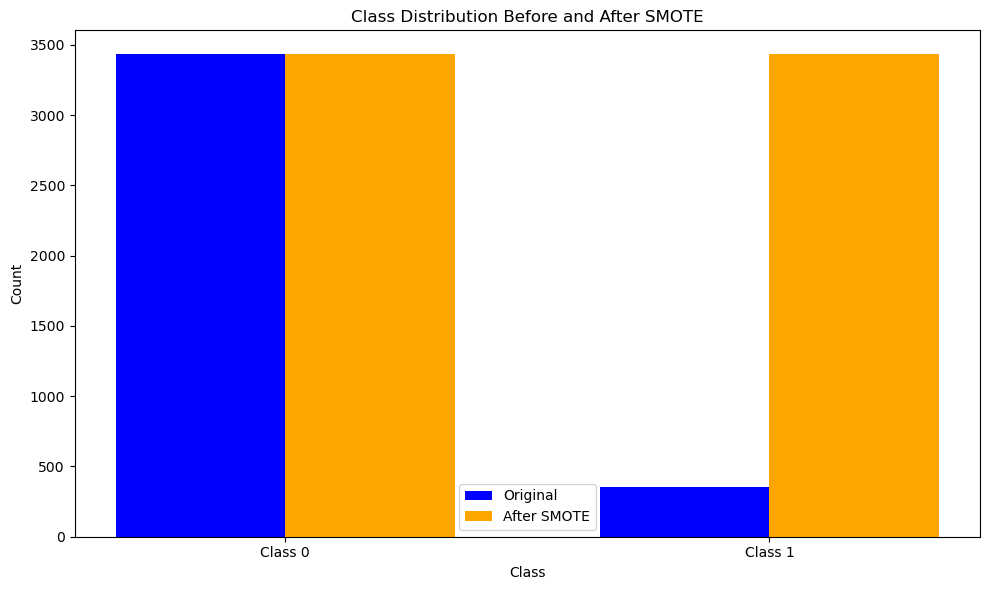

In [65]:
# Original class distribution
original_class_distribution = Counter({0: 3432, 1: 354})
# New class distribution after SMOTE
new_class_distribution = Counter({0: 3432, 1: 3432})

# Extracting the values for the bar chart
labels = ['Class 0', 'Class 1']
original_values = [original_class_distribution[0], original_class_distribution[1]]
new_values = [new_class_distribution[0], new_class_distribution[1]]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
width = 0.35

# Plotting the original class distribution
ax.bar(x, original_values, width, label='Original', color='blue')
# Plotting the new class distribution after SMOTE
ax.bar([p + width for p in x], new_values, width, label='After SMOTE', color='orange')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After SMOTE')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)

# Adding legend
ax.legend(loc='best')

plt.tight_layout()
plt.show()

In [66]:
#print('X_teststd',X_teststd.shape)

## SECTION 3:  Model Building and Evaluation

### 1st Model: Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

lr_model.fit(X_train_smote,y_train_smote)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

In [68]:
## Lets predict probability of 1 and 0 for X_train and X_val

lr_train_pred_probability=lr_model.predict_proba(X_train_smote)
lr_val_pred_probability=lr_model.predict_proba(X_val)

### Logistic Regression Model Prediction for Train and Validation

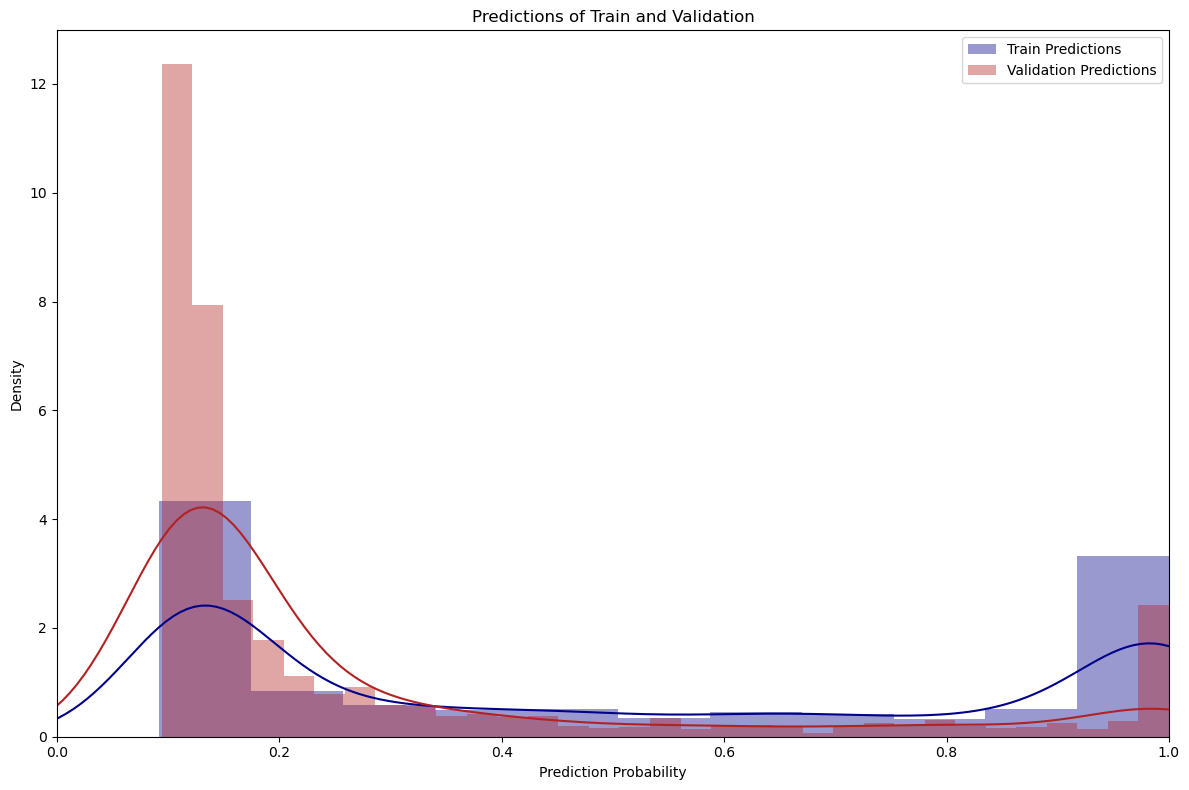

In [69]:
# Lets compare model prediction performance on train and Validation both.

fig = plt.figure(figsize=(12, 8))

sns.distplot(lr_model.predict_proba(X_train_smote)[:, 1], color='darkblue', label='Train Predictions')
sns.distplot(lr_model.predict_proba(X_val)[:, 1], color='firebrick', label='Validation Predictions')

plt.title('Predictions of Train and Validation')
plt.xlabel('Prediction Probability')
plt.ylabel('Density')
plt.legend(loc='best')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()


### Logistic regression : ROC Curve

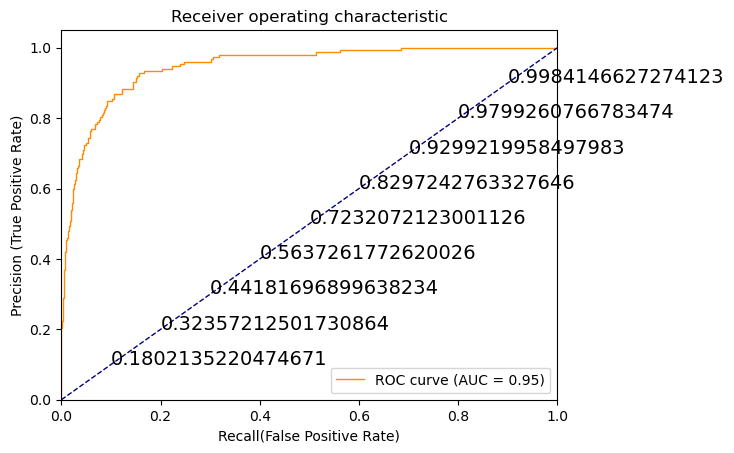

In [70]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,lr_model.predict_proba(X_val)[:,1])         #lr_model_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(False Positive Rate)')
plt.ylabel('Precision (True Positive Rate)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [71]:
fpr, tpr, thresholds =roc_curve(y_val, lr_model.predict_proba(X_val)[:,1],pos_label=1) #lr_model_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.947319


### Confusion Matrix

In [72]:
pred_lm = lr_model.predict(X_val)

In [73]:
confusion_matrix(y_val, pred_lm)

array([[1333,  138],
       [  23,  129]], dtype=int64)

In [74]:
confusion_matrix(y_val, pred_lm)

array([[1333,  138],
       [  23,  129]], dtype=int64)

In [75]:
labels = ['0: Non-Fraudulent', '1: PotentialFraudulent']

pd.DataFrame(data=confusion_matrix(y_val, pred_lm), index=labels, columns=labels)

,0: Non-Fraudulent,1: PotentialFraudulent
0: Non-Fraudulent,1333,138
1: PotentialFraudulent,23,129


In [76]:
print('Classification Report')
print(classification_report(y_val, pred_lm, target_names=['0: Non-Fraudulent', '1: PottentialFraudulent']))

Classification Report
                         precision    recall  f1-score   support

      0: Non-Fraudulent       0.98      0.91      0.94      1471
1: PottentialFraudulent       0.48      0.85      0.62       152

               accuracy                           0.90      1623
              macro avg       0.73      0.88      0.78      1623
           weighted avg       0.94      0.90      0.91      1623



**Interpretation of The Logistic Regression Model Result**

We now have a far more comprehensive view of the performance of our model.

- Clearly, the precision, recall, and F1 score **values for the Non-fraudulent class are higher**, and this has to do with the class imbalance we referred to earlier in this project. There are more observations with the Non-fraudulent label, so the model gets **_better_** at classifying those ones because it has more evidence of them.

- The corresponding **values in the PottentialFraudulent class are lower** for the same reason.
- We tried to correct this with **SMOTE**(Synthetic Minority Oversampling Technique) Method but the Technique has its own shortfalls.

- The **weighted F1 score** here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 0, of which there were more examples.

- Perhaps the most important information in the above table is in the last row, indicating the weighted average.

- Unlike the values in the `macro avg` row which are computed using: 

$$\frac{class\_0\_metric \quad + \quad class\_1\_metric}{2}$$ 

- The `weighted avg` values are computed using: 

$$\frac{class\_0\_metric \, \times \, \%\_class\_0\_labels  \quad + \quad class\_1\_metric \, \times \, \%\_class\_1\_labels}{2}$$ 

which takes into account the **proportions of each class** fed into the model.

### 2nd: Other Models and their Performance

In [77]:
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import pprint

In [78]:
# Define the classifiers with corrected SVC probability parameter
clfs = {
    #'mnb': MultinomialNB(),
    'svm1': SVC(C=0.01, kernel='linear', probability=True),
    'svm2': SVC(C=0.01, kernel='rbf', probability=True),
    'svm3': SVC(C=0.01, kernel='poly', degree=2, probability=True),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(class_weight='balanced'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(class_weight='balanced'),
    'xgb': XGBClassifier(booster='gbtree')
}

In [79]:
# Fit the models and check their performance
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train_smote, y_train_smote)
    y_pred = (clf.predict_proba(X_val)[:, 1] > 0.5).astype(bool)
    f1_scores[clf_name] = f1_score(y_val, y_pred)

svm1
svm2
svm3
ada
dtc
gbc
lr
xgb


In [80]:
# Print the F1 scores
pprint.pprint(f1_scores)

{'ada': 0.5295404814004376,
 'dtc': 0.5013192612137203,
 'gbc': 0.5743073047858942,
 'lr': 0.6168674698795181,
 'svm1': 0.6101694915254238,
 'svm2': 0.546236559139785,
 'svm3': 0.5612903225806452,
 'xgb': 0.5818181818181818}


**Insight**
- Above values shows that **Logistic regression model** is performing better compared to other models.


## Summary:

- Majority of the claim Beneficiary (InPatients) are between the age of 65 - 90 years. The Old group
- From the age categogization, 22.4% fell in the old category, 4% fell in the working class category and less than 1% fell in the young category
- Almost all claim beneficiaries are alive.
- 26.5% alive and 0.27% dead
- 40,474 claim beneficiaries (Inpatients) were admitted.
- 57.82% of admissions are potentially fraudulent activities.
- Out of 2,092 providers that admitted claim beneficiaries (inpatient), 440 are potentially fraudulent.
- 21.03% of the providers that admitted inpatients are potentially fraudulent.
- 517,737 claim beneficiaries (outpatient) were not admitted.
- 36.58% of outpatients are potentially involved in fraudulent activities.
- Out of 5,012 providers that attended to outpatient claim beneficiaries, 462 are potentially fraudulent.
- 9.21% of the outpatient providers are potentially fraudulent.
- The most commonly used claim procedure code is 4019.
- The most commonly used claim diagnostic code is 4019.
- Logistic Regression is the best performing model.

## Challenges:

- The dataset used for this project is highly imbalanced, which is typical for fraud detection datasets.
- The project timeframe is very limited, leaving insufficient time for a detailed exploratory data analysis (EDA) to uncover more insights.